# Laboratory 03: Bringing Balanced to The Force  \& SVM #


Armed with the knowledge about SVM's, it is now time to put it to good use. In this spirit we're going to try to detect some fraudulent transactions using the [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) dataset. 

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group [http://mlg.ulb.ac.be] of ULB (Université Libre de Bruxelles) and it contains transactions made by credit cards in September 2013 by European cardholders. The transactions are represented by a set of 30 numerical features and label denoting normal transaction with 0 and fraudulent transaction with 1. Out of the 30 features only *Time* and *Amount* are original recored features. Whereas the rest of the features, *V1* through *V28*, are numerical features obtained via the application of Principal Component Analysis (PCA) on of the original features due to confidentiality and security concerns.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Unfortunately, this dataset is renowned for its imbalance. So let's actually see how imbalanced it is. 

**Exercise 1**

First load the data the pandas dataframe `credit_df` from the `datasets/fraud/creditcard.csv` file and print summary statistics.

In [ ]:
#TODO 1.1: Load the data
credit_df = pd.read_csv('dataset/creditcard.csv')

In [ ]:
# TODO 1.2: Print summary statistics
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Now let's see some value counts for each class by saving them in `normal_count` and `fraud_count`.

*Note:* You can use the `.value_counts()` method for `pd.Series` objects.

In [ ]:
# TODO 1.3. Compute value counts for each ''
normal_count, fraud_count = credit_df.value_counts(['Class'])

So, the data point counts of each class in the dataset are:

In [ ]:
print('Normal transactions: ', normal_count)
print('Fraudulent transactions: ', fraud_count)

Normal transactions:  284315
Fraudulent transactions:  492


Which means that the percentage of fraudulent transactions within the dataset is: 

In [ ]:
print('Percentage: {}%'.format(np.round((fraud_count/(normal_count + fraud_count)*100),4)))

Percentage: 0.1727%


Ok, but what about the features? Well since the V1 - V28 features were obtained via PCA, we can plot the correlation matrix to see if they are independent. To accomplish this use `seaborn`'s heatmap method as we have done in the previous lab.

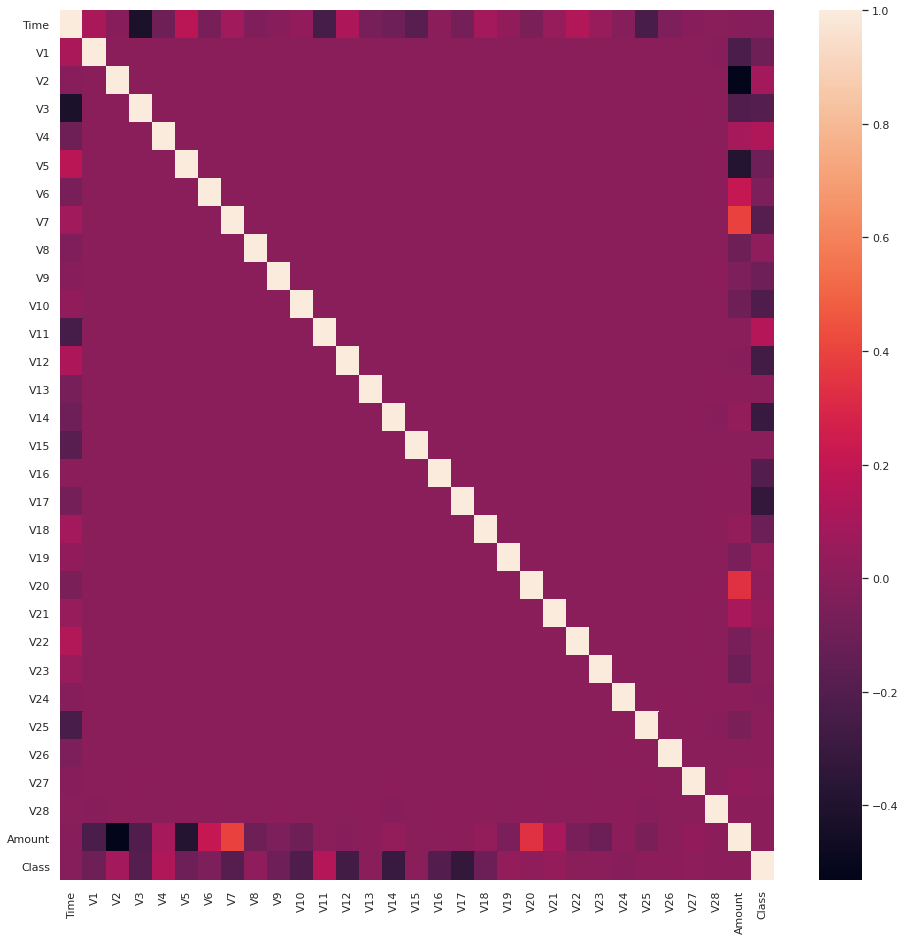

In [ ]:
# TODO 1.4. Import seaborn library
import seaborn as sb
# TODO 1.5. Generate the correlation matrix - you may want round to 1 decimal point
credit_corr = credit_df.round(1).corr()

# TODO 1.6. Plot the correlation matrix
# Note: Set a figure size of at least (16, 16)
sns.set(rc={'figure.figsize': (16, 16)})
sns.heatmap(credit_corr)

As we expected, there little to no correlation between the futures. This indeed indicates that a PCA was run on the original data. However, `Time` seems to have some correlation with the other features. Is this really so? Let's scatter plot the fraudulent transactions `Amount` against `Time` to see if plays any role. Complete the TODO's bellow:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


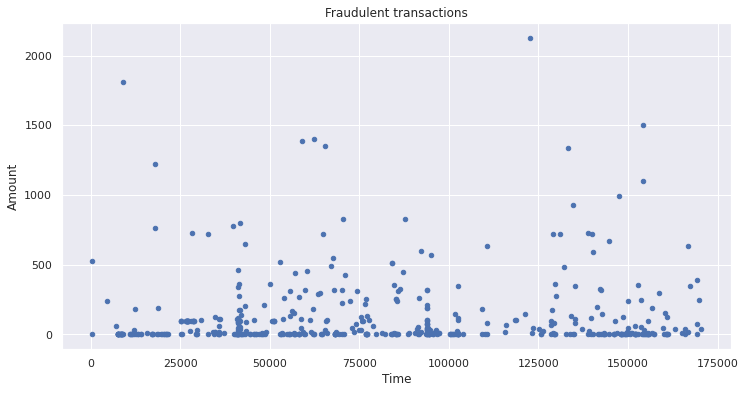

In [ ]:
# TODO 1.7. Select only the fradulent transactions in fraud_df
fraud_df = credit_df[credit_df['Class'] > 0]

# TODO 1.8. Use pandas scatter plot for Time vs Amount
fraud_df.plot(x='Time', y='Amount', kind='scatter', title='Fraudulent transactions', figsize=(12,6))


Does the `Time` feature play any role and why? 

Anyway go ahead and drop this feature to ensure we have no surprises.

In [ ]:
# TODO 1.9. Drop the Time column inplace from credit_df
credit_df.drop(['Time'], 1, inplace=True)

## The metric trap 

One of the major issues that young payers fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like `accuracy_score` can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate. For example, if our classifier would predict every transaction as normal it would have an accuracy of $99.8273$\%.

**Exercise 2**

To see this we're going to import `accuracy_score` from `sklearn.metrics` and a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier from the `sklearn.linear_model` library. You'll need tryout two cases with a 80/20 train/test:
 - in the first case train the classifier with using all the features in `credit_df`
 - in the second case train the classifier with only the V1 feature in `credit_df`

**Note:** Don't forget to also import the `train_test_split` function.


In [ ]:
# TODO 2.1. Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#### Case 1 ####

# TODO 2.2. Setup features and targets (X, y)
X = credit_df.drop(['Class'], 1)
y = credit_df['Class']

# TODO 2.3. Do an 80/20 train/test split with random_state=21
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# TODO 2.4. Instantiate a LogisticRegression clasifier in credit_reg
# with with n_jobs=-1 and random_state=21
credit_reg = LogisticRegression(n_jobs=-1, random_state=21)

# TODO 2.5. Train the classifier
credit_reg.fit(X_train, y_train)

# TODO 2.6. Compute the prediction on the test set in y_pred
y_pred = credit_reg.predict(X_test)

# TODO 2.7. Compute the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy with all features: {:.2f}% '.format(accuracy*100))

Accuracy with all features: 99.89% 


Now repeat the same steps for the second case by selecting only the V1 feature for X.

In [ ]:
#### Case 2 ####

# TODO 2.8. Implement the model with only the V1 feature
# Note: don't forget to the apropiate reshape operation for X
X = credit_df['V1'].to_numpy().reshape(-1, 1)
y = credit_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
credit_reg = LogisticRegression(n_jobs=-1, random_state=21)
credit_reg.fit(X_train, y_train)

y_pred = credit_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy with V1 feature: {:.2f}% '.format(accuracy*100))

Accuracy with V1 feature: 99.81% 


## Confusion matrix 

An interesting way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect predictions for each class. In the first row, the first column indicates how many classes 0 were predicted correctly, and the second column, how many classes 0 were predicted as 1. In the second row, we note that all class 1 entries were erroneously predicted as class 0.

Therefore, the higher the diagonal values of the confusion matrix the better, indicating many correct predictions. 

In sklearn this functionality is provided through the [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) from `sklearn.metrics` library. You can use our previous LogisticRegression model to generate a confusion matrix plot below:

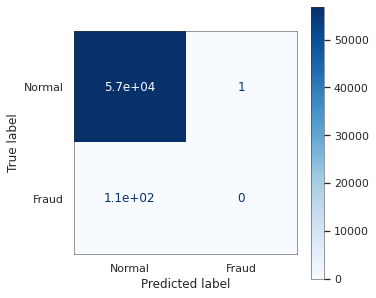

In [ ]:
class_names = ['Normal', 'Fraud']
plt.rcParams["axes.edgecolor"] = '0.2'
plt.rcParams["axes.linewidth"]  = 0.5    
plt.rcParams["axes.grid"]  = 'False'    
fig, ax = plt.subplots(figsize=(5, 5))

# TODO 2.9. Plot the confusion matrix using:
# - cmap=plt.cm.Blues
# - display_labels=class_names 
# - ax=ax
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(credit_reg, X_test, y_test, cmap=plt.cm.Blues, display_labels=class_names, ax=ax)

Is our model correct? Does it do anything useful?

## Resampling

To mitigate the problems associated  with highly unbalanced datasets a widely adopted technique is called resampling. Resampling data can be achieved in two main ways:
- removing samples from the majority class (under-sampling). 
- adding more examples from the minority class (over-sampling).

<img src='res/resampling.png' height=80% width=80% />

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the *minority class*, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the *majority class*, which can cause loss of information. Of course, when appropriate we may combine the two techniques. However, a number of more sophisticated resampling techniques have been proposed in the scientific literature. For  example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.


### imbalanced-learn

Some of these resampling techniques are available in the  [imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable/api.html) library. The library is compatible with scikit-learn and is part of scikit-learn-contrib projects.

For example, we can randomly under-sample our data by using the [`RandomUnderSampler`](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html?highlight=RandomUnderSampler) from the `imblearn.under_sampling` module such that both fraud and normal transaction examples number of data points is equal to 492. 

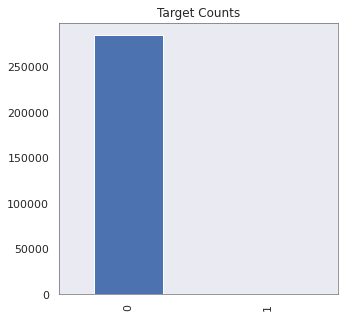

In [ ]:
X = credit_df.drop('Class', axis=1).to_numpy()
y = credit_df['Class'].to_numpy()

credit_df['Class'].value_counts().plot(kind='bar', title='Target Counts', figsize=(5,5));

Our under-sampling strategy in this case will be `majority` such that only the class of normal transactions will be randomly removed.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


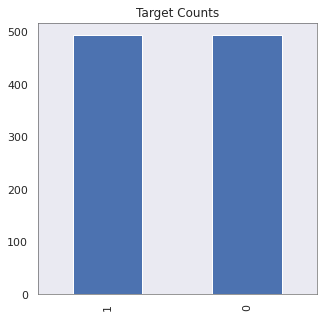

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = credit_df.drop('Class', axis=1).to_numpy()
y = credit_df['Class'].to_numpy()

rus = RandomUnderSampler(sampling_strategy='majority',random_state=21)
X_rus, y_rus = rus.fit_resample(X, y)

df = pd.DataFrame(X_rus)
df['target'] = y_rus
df['target'].value_counts().plot(kind='bar', title='Target Counts', figsize=(5,5))

Similarly, we can randomly over-sample the data by using [`RandomOverSampler`](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler) from `imblearn.over_sampling` module such that our number of data points is 284807. Note that here our sampling strategy is `minority` such that only points from the fraudulent transaction will be randomly duplicated.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


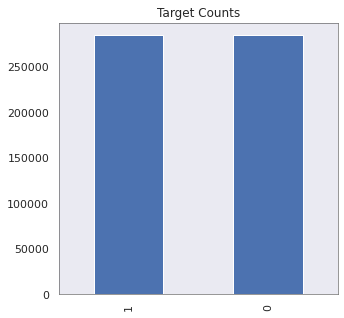

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = credit_df.drop('Class', axis=1).to_numpy()
y = credit_df['Class'].to_numpy()

ros = RandomOverSampler(sampling_strategy='minority', random_state=21)
X_ros, y_ros = ros.fit_sample(X, y)

# Plotting class distribution
df = pd.DataFrame(X_ros)
df['target'] = y_ros
df['target'].value_counts().plot(kind='bar', title='Target Counts', figsize=(5,5))

Ok, thats great! But, in such an extreme case of imbalance randomly under- or over- sampling will simply remove or duplicate points. Hence, there's no new synthetic examples such that a classifier may benefit form a little variation. So, in consequence a classifier will not be able to generalize well. Fortunately, there are more advanced resampling methods we can use and even combine. 

### Under-sampling: Tomek links

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

<img src='res/tomek.png' height=80% width=80% />


**Exercise 3**

The [`TomekLinks`](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.TomekLinks.html#imblearn.under_sampling.TomekLinks) under-sampler is located in the `imblearn.under_sampling` and similarly we can use `majority` to remove points only from the normal transaction class.

Complete the TODO's below. Note that it may take a while for the under-sampling to complete.

In [ ]:
X = credit_df.drop('Class', axis=1).to_numpy()
y = credit_df['Class'].to_numpy()

# TODO 3.1. Import TomekLinks resampler from under_sampling in imblearn
from imblearn.under_sampling import TomekLinks

# TODO 3.2. Instantiate the resampler in tomek with:
# - a majority sampling strategy and njob=-1
#tomek = TomekLinks(sampling_strategy='majority', n_jobs=-1, random_state=21)
tomek = TomekLinks(sampling_strategy='majority', n_jobs=-1)

# TODO 3.3. Generate (X_rus, y_rus) using tomek
#X_rus, y_rus = tomek.fit_resample(X, y)
X_rus, y_rus = tomek.fit_sample(X, y)

df = pd.DataFrame(X_rus)
df['target'] = y_rus
normal_count, fraud_count = df['target'].value_counts()
print('Normal transactions: ', normal_count)
print('Fraudulent transactions: ', fraud_count)

Normal transactions:  284288
Fraudulent transactions:  492


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Why does the number of points in each class does not match?

### Over-sampling: SMOTE


SMOTE (Synthetic Minority Oversampling Technique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly peaking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

<img src='res/smote.png' height=80% width=80% />

**Exercise 4**

The [`SMOTE`](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE) over-sampler in the `imblearn.over_sampling` module. As with the RandomOverSampler, generate the (X_ros, y_ros) pair by using a `minority` sampling strategy in the TODO's bellow. Note that it may take a while for the over-sampling to complete.

In [ ]:
X = credit_df.drop('Class', axis=1).to_numpy()
y = credit_df['Class'].to_numpy()

# TODO 4.1. Import TomekLinks resampler
from imblearn.over_sampling import SMOTE


# TODO 4.2. Instantiate the resampler in smote with:
# - a majority sampling strategy and njobs=-1
# smote = SMOTE(sampling_strategy='minority', n_jobs=-1, random_state=21)
smote = SMOTE(sampling_strategy='minority', n_jobs=-1)

# TODO 4.3. Generate (X_rus, y_rus) using smote
X_ros, y_ros = smote.fit_sample(X, y)

df = pd.DataFrame(X_ros)
df['target'] = y_ros
normal_count, fraud_count = df['target'].value_counts()
print('Normal transactions: ', normal_count)
print('Fraudulent transactions: ', fraud_count)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Normal transactions:  284315
Fraudulent transactions:  284315


### Combining Over and Under Sampling

One possible (good) strategy for our data set is to first use SMOTE such that we generate new synthetic points and then TomekLinks to increase the gap between the two classes.  

**Exercise 5**

The `imblearn` library also contains a `combine` module from which we can import [`SMOTETomek`](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html#imblearn.combine.SMOTETomek) re-sampler. This resampler first performs SMOTE over-sampling and then performs Tomek under-sampling to clean up the data. The strategy we will use in this case is a custom one, which is the default parameter for the `sampling_strategy` parameter. 

Complete the TODO's below to generate the resampled version of the dataset (X_rs, y_rs).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Normal transactions:  284315
Fraudulent transactions:  284315


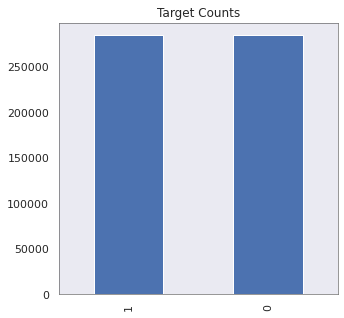

In [88]:
X = credit_df.drop('Class', axis=1).to_numpy()
y = credit_df['Class'].to_numpy()

# TODO 5.1. Import SMOTETomek resampler
from imblearn.combine import SMOTETomek

# TODO 5.2. Instantiate the resampler in smote_tomek with njobs=-1
# smote_tomek = SMOTETomek(random_state=21)
smote_tomek = SMOTETomek()

# TODO 5.3. Generate (X_rs, y_rs) using tomek
X_rs, y_rs = smote_tomek.fit_sample(X, y)

# TODO 5.4. Plot the class distribution for (X_rs, y_rs)
df = pd.DataFrame(X_rs)
df['target'] = y_rs
df['target'].value_counts().plot(kind='bar', title='Target Counts', figsize=(5,5))

# TODO 5.5. Print the value counts for each class
normal_count, fraud_count = df['target'].value_counts()

print('Normal transactions: ', normal_count)
print('Fraudulent transactions: ', fraud_count)

## sklearn.svm

In sklearn the Support Vector Machine is located under the [`svm`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) module. While there are a few options of svm algorithms to chose from, here we will use the [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class since its the most generic in terms of kernels we can select. The main parameters we can supply are follows:
 - `kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}` represents the kernel to be applied to the data
 - `C:float` represents the slack penalty and must be greater than zero
 - `gamma` which in the case of the rbf kernel selects its width
 
 
**Exercise 6**

So without further ado:
1. Instantiate a SVM model with an rbf kernel
2. Make an 80/20 split of our resampled data (X_rs, y_rs)
3. Downsample the data using a RandomUnderSampler with a dict strategy given by {0:50000, 1:50000}. Note that this is not normally required. However, here, this will speed up the process so that we can get a result faster.
4. Use the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) from sklearn.preprocessing to normalize the data. Note that while the scaler is computed on the X_train data, it must be applied to both X_train and X_test.
4. Fit the model
5. Then use it to predict the labels on a test set
6. Finally, generate a confusion matrix plot

**Note:** Don't forget to pass a `random_state=21` to get reproducible results and stay patient because training will take a while :) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


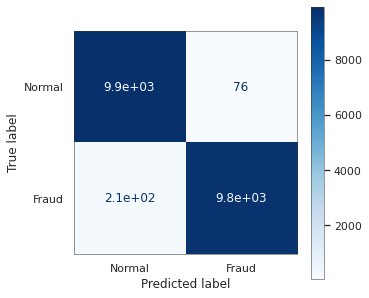

In [89]:
# TODO 6.1. Instantiate an SVC model
from sklearn.svm import SVC
credit_svm = SVC(kernel='rbf')

# TODO 6.2. Downsample the data with {0:50000, 1:50000}
# X = credit_df.drop('Class', axis=1).to_numpy()
# y = credit_df['Class'].to_numpy()
# nr_points = 1000
nr_points = 50000
rus = RandomUnderSampler(sampling_strategy={0:nr_points, 1:nr_points}, random_state=21)
X_ds, y_ds = rus.fit_sample(X_rs, y_rs)

# TODO 6.3. Do a 80/20 train/test split for (X_rs, y_rs)
X_train, X_test, y_train, y_test = train_test_split(X_ds, y_ds, test_size=0.2, random_state=21)

# TODO 6.3. Normalize the data using StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# TODO 6.4. Fit the SVM model
credit_svm.fit(X_train, y_train)

# TODO 6.5. Predict the test set labels
y_pred = credit_svm.predict(X_test)


class_names = ['Normal', 'Fraud']
plt.rcParams["axes.edgecolor"] = '0.2'
plt.rcParams["axes.linewidth"]  = 0.5    
plt.rcParams["axes.grid"]  = 'False'    
fig, ax = plt.subplots(figsize=(5, 5))

# TODO 6.6. Plot the confusion matrix
plot_confusion_matrix(credit_svm, X_test, y_test, cmap=plt.cm.Blues, display_labels=class_names, ax=ax)

You can, of course, play with the parameters. But since training takes quite long, I suggest you take a look at [sklearn pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). The idea is to design a pipeline that combines the resampling steps with GridSearch and cross validation such that you can let the computer find the combination that works best. 

In [ ]:
# from sklearn.pipeline import Pipeline
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from sklearn.model_selection import RandomizedSearchCV

# pipe = imbalanced_make_pipeline(RandomUnderSampler(), StandardScaler(), SVC())
# param_grid = {
#     'randomundersampler__sampling_strategy': [{0:50000, 1:50000}, {0:40000, 1:40000}, {0:30000, 1:30000}, {0:20000, 1:20000}, {0:10000, 1:10000}, {0:5000, 1:5000}, {0:1000, 1:1000}]
# }
# search = RandomizedSearchCV(pipe, param_grid, n_jobs=-1, cv=5, random_state=21)
# search.fit(X_rs, y_rs)
# print("Best parameter (CV score=%0.3f):" % search.best_score_)
# print(search.best_params_)